# 1. Data Gathering

In [113]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
import tweepy
import re 
import json
import os
import seaborn as sns;  sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Import the twitter-archive-enhanced CSV file into a DataFrame
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Check to see if the file was imported correctly
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# Making a list of tweet_id
tweet_ids = df.tweet_id

In [10]:
consumer_key = 'NMUjX6CrI5MBQ6lYusGxFLHRm'
consumer_secret = 'dfsfl6Ra0qlyKAfzW3H67q5MUzvkafHa7Bz7YWiuHwhxOxRoe7'
access_token = '1127784374911377410-RiWfNPH4FWPN0n2ciMlznnpKBSqlwI' 
access_secret = '7CLCUIXuyqlJRvs2SuWuNNYNLYQ0gCYQLRXS1frMsoNWF'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweets_data = []
deleted = []

for tweet_id in tweet_ids:
    print(tweet_id)
    try:
        tweet = api.get_status(tweet_id)
        tweets_data.append(tweet)
    except:
        deleted.append(tweet)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425819140
816014286006976512
815990720817401858
815966073409433600
815745968457060357
815736392542261248
815639385530101762
815390420867969024
814986499976527872
814638523311

762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272
758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802

707995814724026368
707983188426153984
707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685

680070545539371008
680055455951884288
679877062409191424
679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514

669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458302977
668902994700836864
668892474547511297
668872652652679168
668852170888998912
668826086256599040
668815180734689280
668779399630725120
668655139528511488
668645506898350081
668643542311546881
668641109086707712
668636665813057536
668633411083464705
668631377374486528
668627278264475648
668625577880875008
668623201287

In [11]:
# Create empty list for each twitter status to be stored
json_strs = []

for tweet_data in tweets_data:
    json_str = json.dumps(tweet_data._json)
    json_strs.append(json_str)

In [12]:
with open('tweet_json.txt', 'w') as outfile:
    json.dump(json_strs, outfile)
    
with open('tweet_json.txt', 'r') as fp:
    obj = json.load(fp)

In [13]:
# From the object of list to make a dictionary
tweets_dict = []
for line in obj:
    tweet_line = json.loads(line)
    tweets_dict.append(tweet_line)

In [14]:
# Create a pandas DataFrame using the keys from the first line
columns = [ 'id', 'retweet_count', 
           'favorite_count', 'favorited', 'retweeted','in_reply_to_status_id','in_reply_to_user_id']

df_tweets = pd.DataFrame(tweets_dict, columns=columns)

In [15]:
df_tweets.head(5)

,id,retweet_count,favorite_count,favorited,retweeted,in_reply_to_status_id,in_reply_to_user_id
0,892420643555336193,8183,37509,False,False,NaN,NaN
1,892177421306343426,6054,32239,False,False,NaN,NaN
2,891815181378084864,4004,24288,False,False,NaN,NaN
3,891689557279858688,8332,40849,False,False,NaN,NaN
4,891327558926688256,9032,39047,False,False,NaN,NaN


In [18]:
#using a request library for dowloading tsv file from give URL.
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
df_images = pd.read_csv('image-predictions.tsv', sep='\t')
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# 2.Data Assesment
In the cells below, each column of three different table is described.

# 2.1 Visual Assesment

In [19]:
#viewing the df dataframe
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,None,None,None
741,780496263422808064,NaN,NaN,2016-09-26 19:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bell. She likes holding...,7.424232e+17,4.196984e+09,2016-06-13 18:27:32 +0000,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
1429,697596423848730625,NaN,NaN,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697596423...,11,10,None,None,None,pupper,None
1808,676897532954456065,NaN,NaN,2015-12-15 22:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None
1927,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She knits. Specializes in tobogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556...,10,10,Lucy,None,None,None,None
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,None,None,None,None
693,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
535,807059379405148160,NaN,NaN,2016-12-09 03:08:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Cali. She arrived preas...,7.829691e+17,4.196984e+09,2016-10-03 15:42:44 +0000,https://twitter.com/dog_rates/status/782969140...,12,10,Cali,None,None,None,None


In [20]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1243,747219827526344708,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2,Shetland_sheepdog,0.548018,True,marmot,0.165503,False,collie,0.043003,True
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
1571,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True


In [21]:
df_tweets.sample(5)

,id,retweet_count,favorite_count,favorited,retweeted,in_reply_to_status_id,in_reply_to_user_id
1716,679729593985699840,865,2231,False,False,NaN,NaN
1359,701601587219795968,478,2157,False,False,NaN,NaN
846,762471784394268675,6886,11771,False,False,NaN,NaN
1850,675153376133427200,2674,6348,False,False,NaN,NaN
159,859924526012018688,4085,19437,False,False,NaN,NaN


# 2.2 Programmatic Assesment 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


# checking for the duplicates in the dataframe

In [24]:
assert [df.duplicated() == False]

In [25]:
assert [df_images.duplicated() == False]

In [26]:
assert [df_tweets.id.duplicated() == False]

In [27]:
df.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
Bailey              7
Buddy               7
an                  7
Toby                7
Daisy               7
Jack                6
Scout               6
Dave                6
Stanley             6
Oscar               6
Bella               6
Leo                 6
Milo                6
Koda                6
Rusty               6
Jax                 6
Sunny               5
                 ... 
Jaspers             1
Cupid               1
Sage                1
Carper              1
Jameson             1
Hubertson           1
Beya                1
Jed                 1
Rumpole             1
Linus               1
Mark                1
Steve               1
Ulysses             1
DayZ                1
Kayla     

In [28]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
#row not having rating
df[df.tweet_id==835152434251116546]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None


In [31]:
# Check if there are any records in arc_df which are retweets
len(df[df.retweeted_status_id.isnull() == False])

181

In [32]:
#investigating the denominator value less than 10
df[df['rating_denominator']<10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [33]:
#investigating the denominator value greater than 20
df[df['rating_denominator']>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [34]:
#investigating the denominator equal to 0
df[df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [35]:
#investigating the numerator value less than 10
df[df['rating_numerator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [36]:
#investigating the numerator value greater than 20
df[df['rating_numerator']>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [37]:
#investigating the numerator equal to 10
df[df['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [38]:
#verify if any of the record has missed the type of dog
len(df[(df.doggo != 'None') & (df.floofer != 'None')&(df.pupper != 'None')&(df.puppo != 'None')])


0

In [39]:
#verifying if any record has two type of record
df[(df.doggo == "doggo") & (df.pupper == "pupper")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [40]:
df[(df.doggo == "doggo") & (df.puppo == "puppo")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [41]:
df[(df.floofer == "floofer") & (df.pupper == "pupper")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
df[(df.floofer == "floofer") & (df.puppo == "puppo")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
df[(df.pupper == "pupper") & (df.puppo == "puppo")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
df[(df.doggo == "doggo") & (df.floofer == "floofer")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [45]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 7 columns):
id                       2337 non-null int64
retweet_count            2337 non-null int64
favorite_count           2337 non-null int64
favorited                2337 non-null bool
retweeted                2337 non-null bool
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
dtypes: bool(2), float64(2), int64(3)
memory usage: 95.9 KB


In [46]:
#checking the unique value of each column
df_tweets.nunique()

id                       2337
retweet_count            1690
favorite_count           1994
favorited                   1
retweeted                   1
in_reply_to_status_id      76
in_reply_to_user_id        30
dtype: int64

In [47]:
df_tweets.describe()

,id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id
count,2.337000e+03,2337.000000,2337.000000,7.700000e+01,7.700000e+01
mean,7.420692e+17,2875.680359,7836.810869,7.440692e+17,2.040329e+16
std,6.824243e+16,4858.006640,12147.073624,7.524295e+16,1.260797e+17
min,6.660209e+17,1.000000,0.000000,6.658147e+17,1.185634e+07
25%,6.783345e+17,579.000000,1360.000000,6.757073e+17,3.589728e+08
50%,7.185406e+17,1344.000000,3417.000000,7.032559e+17,4.196984e+09
75%,7.986825e+17,3352.000000,9599.000000,8.233264e+17,4.196984e+09
max,8.924206e+17,82409.000000,162001.000000,8.862664e+17,8.405479e+17


In [48]:
df_tweets.favorited.value_counts()

False    2337
Name: favorited, dtype: int64

In [49]:
df_tweets.retweeted.value_counts()

False    2337
Name: retweeted, dtype: int64

In [50]:
#Viewing info of image dataframe
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
#Viewing the descriptive statistics
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [52]:
df_images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [53]:
rare_things= df_images.groupby('p1').filter(lambda x: len(x) < 3)

In [54]:
rare_things.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False


In [55]:
len(rare_things)

271

In [56]:
len(df_images)

2075

In [57]:
# Check if there are any IDs in df are missing images.
len(df[~df.tweet_id.isin(df_images.tweet_id)])

281

# Quality

1. Timestamp is object needs to be datetime object.
2. Few columns have empty values: n_reply_to_status, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_time.
3. Giving more meaningful name to the columns type (p1, p2 and p3).
4. Few of the dogs have been entered into two diferent type of dogs eg. both doggo and pupper.
5. Some names in the name column doesnot seem a valid name.
6. The dog names have lower case
7. There is differencs in the rows of the tables i.e. df has 2356 rows, image has 2075 and tweets has 2337 rows.looks like there are tweets without picture.
8. The numerator and denominator has some unnecessary value i.e. numerator is greater than 20 and denominator less than 10 etc.
9. Rename the column id to  tweet_id so that it can be Foreign key for merging table.
10. Dropping the unwanted columns from the image table.



# Tidiness
1. We don't need the all the column from all the dataframe so we can drop them before merging and doing analyses.
2. Instead of having four different column i.e. doggo, floofer, pupper and puppo we can make single column assing a value to each.
3. Since we are analysing dog based on retweets and the available images; the table df_tweets, df_images can be merged with df 

# 3. Cleaning

In [58]:
# Making copies three different table
df_clean = df.copy()
dfimages_clean = df_images.copy()
dftweets_clean = df_tweets.copy()

In [59]:
#Testing if the copy has been created or not
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [60]:
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

In [62]:
# Define: Dropping unneded (missing too much values) columns using drop function.

# code
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
expanded_urls         2274 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [64]:
df_clean = df_clean.drop(['expanded_urls'], axis = 1)

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2278 non-null int64
timestamp             2278 non-null object
source                2278 non-null object
text                  2278 non-null object
rating_numerator      2278 non-null int64
rating_denominator    2278 non-null int64
name                  2278 non-null object
doggo                 2278 non-null object
floofer               2278 non-null object
pupper                2278 non-null object
puppo                 2278 non-null object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [66]:
#Code
df_clean = df_clean[df_clean.tweet_id.isin(dfimages_clean.tweet_id)]

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2052 non-null int64
timestamp             2052 non-null object
source                2052 non-null object
text                  2052 non-null object
rating_numerator      2052 non-null int64
rating_denominator    2052 non-null int64
name                  2052 non-null object
doggo                 2052 non-null object
floofer               2052 non-null object
pupper                2052 non-null object
puppo                 2052 non-null object
dtypes: int64(3), object(8)
memory usage: 192.4+ KB


In [68]:
#exclude all extreme and zero values from the numertor and denuminator

#Code
df_clean = df_clean[df_clean['rating_numerator'] != 0 ]
df_clean = df_clean[df_clean['rating_denominator'] >= 10 ]
df_clean = df_clean[df_clean['rating_numerator'] <= 20 ]
df_clean = df_clean[df_clean['rating_denominator'] < 20 ]

In [69]:
#testing
len(df_clean[df_clean['rating_numerator'] > 20 ])

0

In [70]:
len(df_clean[df_clean['rating_denominator'] < 10 ])

0

In [71]:
len(df_clean[df_clean['rating_denominator'] > 20 ])

0

In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2031 non-null int64
timestamp             2031 non-null object
source                2031 non-null object
text                  2031 non-null object
rating_numerator      2031 non-null int64
rating_denominator    2031 non-null int64
name                  2031 non-null object
doggo                 2031 non-null object
floofer               2031 non-null object
pupper                2031 non-null object
puppo                 2031 non-null object
dtypes: int64(3), object(8)
memory usage: 190.4+ KB


In [73]:
#Changing the timestamp into date time object
df_clean.timestamp = pd.to_datetime(
    df_clean.timestamp, infer_datetime_format=True)

In [74]:
#tetsing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2031 non-null int64
timestamp             2031 non-null datetime64[ns]
source                2031 non-null object
text                  2031 non-null object
rating_numerator      2031 non-null int64
rating_denominator    2031 non-null int64
name                  2031 non-null object
doggo                 2031 non-null object
floofer               2031 non-null object
pupper                2031 non-null object
puppo                 2031 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 190.4+ KB


In [75]:
# In Assesment section we saw that in few rows it is entered into two different type of dog instead of one specific type
df_clean.loc[df_clean.tweet_id == 854010172552949760, 'floofer'] = 'None'
df_clean.loc[df_clean.tweet_id == 817777686764523521, 'pupper'] = 'None'
df_clean.loc[df_clean.tweet_id == 801115127852503040, 'doggo'] = 'None'
df_clean.loc[df_clean.tweet_id == 785639753186217984, 'pupper'] = 'None'
df_clean.loc[df_clean.tweet_id == 751583847268179968, 'pupper'] = 'None'
df_clean.loc[df_clean.tweet_id == 855851453814013952, 'doggo'] = 'None'

In [76]:
# the rows having two type of dog is changing to "doggo_pupper" and replacing "pupper" with "None".
doggo_pupper_array = [808106460588765185, 759793422261743616, 741067306818797568, 733109485275860992]
def doggo_pupper(id):
    df_clean.loc[df_clean.tweet_id == id, 'doggo'] = 'doggo_pupper'
    df_clean.loc[df_clean.tweet_id == id, 'pupper'] = 'None'

for id in doggo_pupper_array:
    doggo_pupper(id)

In [77]:
conditions = [
    (df_clean['doggo'] == 'doggo'),
    (df_clean['doggo'] == 'doggo_pupper'),
    (df_clean['floofer'] == 'floofer'),
    (df_clean['pupper'] == 'pupper'),
    (df_clean['puppo'] == 'puppo')]
choices = ['doggo', 'doggo_pupper', 'floofer', 'pupper', 'puppo']
df_clean['dog_type'] = np.select(conditions, choices, default='unknown')

# Dropping the 4 different dog types columns
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [78]:
#testing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2031 non-null int64
timestamp             2031 non-null datetime64[ns]
source                2031 non-null object
text                  2031 non-null object
rating_numerator      2031 non-null int64
rating_denominator    2031 non-null int64
name                  2031 non-null object
dog_type              2031 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 142.8+ KB


In [79]:
df_clean['name'][df_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
df_clean.name[df_clean.name == 'None'].value_counts()

None    640
Name: name, dtype: int64

In [81]:
# Checking if there is still any name with lowercase
df_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          4
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           5
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

In [82]:
dfimages_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [83]:
dfimages_clean= dfimages_clean.rename(columns={'p1':'Breed_probability1', 'p2':'Breed_probability2', 'p3':'Breed_probability3'})


In [84]:
dfimages_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
Breed_probability1    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
Breed_probability2    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
Breed_probability3    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [85]:
#Exclude all rows with P1_confidence less than 0.5 
dfimages_clean = dfimages_clean[dfimages_clean['p1_conf'] > 0.5 ]

In [86]:
# test
assert [dfimages_clean[dfimages_clean['p1_conf'] > 0.5 ]]

In [92]:
#use filter to select only needed columns
dfimages_clean = dfimages_clean.filter(['tweet_id','Breed_probability1','p1_conf'] )

In [93]:
# test 
dfimages_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 2 to 2072
Data columns (total 3 columns):
tweet_id              987 non-null int64
Breed_probability1    987 non-null object
p1_conf               987 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.8+ KB


In [94]:
# Define: use groupby to select not rare things in the data (frequency more than 3)
dfimages_clean = dfimages_clean.groupby('Breed_probability1').filter(lambda x: len(x) > 3)

In [95]:
#tetsing
dfimages_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 2 to 2072
Data columns (total 3 columns):
tweet_id              987 non-null int64
Breed_probability1    987 non-null object
p1_conf               987 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.8+ KB


In [96]:
dftweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 7 columns):
id                       2337 non-null int64
retweet_count            2337 non-null int64
favorite_count           2337 non-null int64
favorited                2337 non-null bool
retweeted                2337 non-null bool
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
dtypes: bool(2), float64(2), int64(3)
memory usage: 95.9 KB


In [97]:
dftweets_clean = dftweets_clean.rename(columns={'id':'tweet_id'})

In [98]:
dftweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 7 columns):
tweet_id                 2337 non-null int64
retweet_count            2337 non-null int64
favorite_count           2337 non-null int64
favorited                2337 non-null bool
retweeted                2337 non-null bool
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
dtypes: bool(2), float64(2), int64(3)
memory usage: 95.9 KB


In [99]:
# Define: filter/select needed columns
# Code
dftweets_clean = dftweets_clean.filter(['tweet_id','favorite_count','retweet_count', 'source', 'user'] )

In [100]:
dftweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [101]:
twitter_archive = pd.merge(df_clean, dfimages_clean, how='outer', on=['tweet_id'])

In [102]:
twitter_archive = pd.merge(twitter_archive, dftweets_clean, how = 'outer', on=['tweet_id'])

In [103]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 12 columns):
tweet_id              2347 non-null int64
timestamp             2031 non-null datetime64[ns]
source                2031 non-null object
text                  2031 non-null object
rating_numerator      2031 non-null float64
rating_denominator    2031 non-null float64
name                  2031 non-null object
dog_type              2031 non-null object
Breed_probability1    987 non-null object
p1_conf               987 non-null float64
favorite_count        2337 non-null float64
retweet_count         2337 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 238.4+ KB


In [104]:
#saving the twitter_archive as csv
twitter_archive.to_csv('twitter_archive_master.csv')

# 4. Analyzing and Visualizing Data

In [105]:
#df_master = pd.read_csv('twitter_archiv.csv')
df_master = pd.read_csv('twitter_archive_master.csv')

In [106]:
df_master.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,p1_conf,favorite_count,retweet_count
count,2347.000000,2.347000e+03,2031.000000,2031.000000,987.000000,2337.000000,2337.000000
mean,1173.000000,7.424254e+17,10.595273,10.000985,0.788163,7836.810869,2875.680359
std,677.664863,6.843085e+16,2.153850,0.031373,0.156627,12147.073624,4858.006640
min,0.000000,6.660209e+17,1.000000,10.000000,0.500373,0.000000,1.000000
25%,586.500000,6.783846e+17,10.000000,10.000000,0.655871,1360.000000,579.000000
50%,1173.000000,7.189719e+17,11.000000,10.000000,0.804177,3417.000000,1344.000000
75%,1759.500000,7.988157e+17,12.000000,10.000000,0.938333,9599.000000,3352.000000
max,2346.000000,8.924206e+17,15.000000,11.000000,1.000000,162001.000000,82409.000000


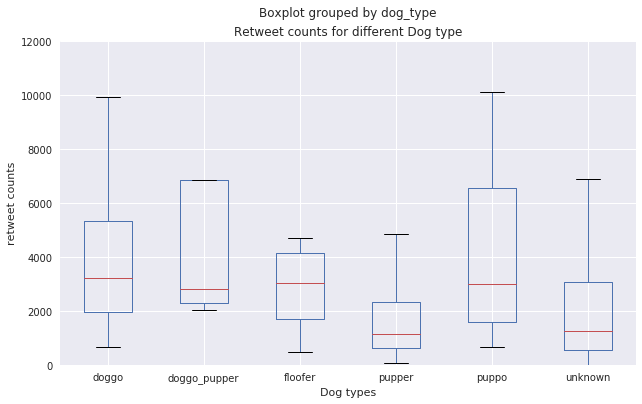

In [107]:
# Plot the DoggoLingo with retweets
plt.rcParams['figure.figsize']=(10,6)
df_master[pd.notnull(df_master['dog_type'])].boxplot(column = ['retweet_count'], by = ['dog_type'])
plt.ylim((0,12000))
plt.title('Retweet counts for different Dog type')
plt.xlabel('Dog types')
plt.ylabel('retweet counts');

Puppo breed recieves consistently high retweets.

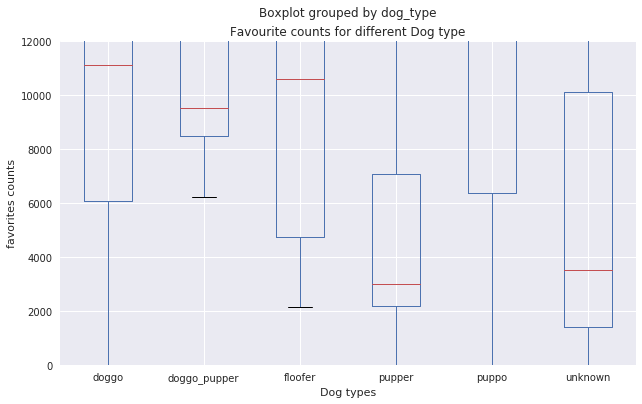

In [108]:
# Plot the DoggoLingo with favorites
plt.rcParams['figure.figsize']=(10,6)
df_master[pd.notnull(df_master['dog_type'])].boxplot(column = ['favorite_count'], by = ['dog_type'])
plt.ylim((0,12000))
plt.title('Favourite counts for different Dog type')
plt.xlabel('Dog types')
plt.ylabel('favorites counts');

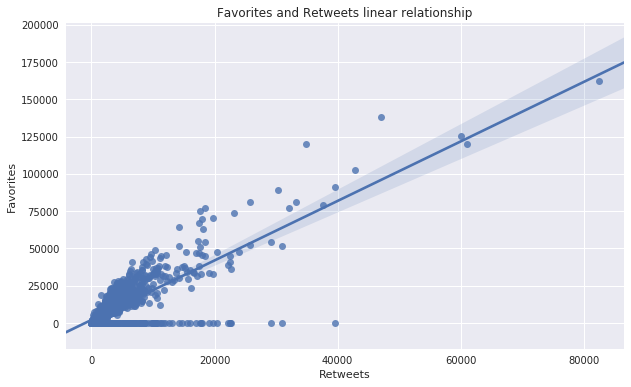

In [110]:
g = sns.regplot(x=df_master.retweet_count, y=df_master.favorite_count)
plt.title("Favorites and Retweets linear relationship")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
fig = g.get_figure()
fig.savefig('scatterplot.png')

In [111]:
df = df_master[['rating_numerator', 'retweet_count', 'favorite_count']]
corr = df.corr()
corr.style.background_gradient()

,rating_numerator,retweet_count,favorite_count
rating_numerator,1,0.299986,0.369185
retweet_count,0.299986,1,0.797948
favorite_count,0.369185,0.797948,1


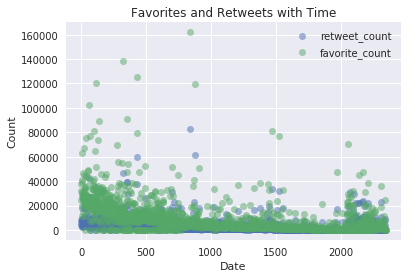

In [118]:
df_master[['retweet_count', 'favorite_count']].plot(style = 'o', alpha = 0.5)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

Looking at the above plot diagram it si clear that time again and over the number of favorites and retweet counts has been increasing continueosly. 

In [117]:
df_master[['retweet_count', 'favorite_count']] 
df_master.sort_values('favorite_count', ascending = False).groupby(['Breed_probability1'], sort = False).describe().head()

Unnamed: 0                                                  \
                        count         mean         std    min     25%     50%   
Breed_probability1                                                              
Labrador_retriever       69.0   888.869565  606.626106   33.0  416.00   777.0   
Chihuahua                50.0  1123.160000  619.460442    2.0  576.00  1088.0   
French_bulldog           22.0   716.681818  614.920234   13.0  145.75   571.5   
Eskimo_dog                9.0   757.444444  616.332928  109.0  272.00   627.0   
swing                     4.0  1160.250000  748.936746  358.0  663.25  1118.0   

                                   favorite_count                    ...       \
                       75%     max          count          mean      ...        
Breed_probability1                                                   ...        
Labrador_retriever  1357.0  2044.0           67.0  12277.716418      ...        
Chihuahua           1694.0  2037.0           48.0   8919.062500      ...        
French_bulldog      1161.0  1885.0           21.0  18451.285714      ...        
Eskimo_dog           915.0  1836.0            9.0  21620.111111      ...        
swing               1615.0  2047.0            4.0  30934.000000      ...        

                   retweet_count          tweet_id                \
                             75%      max    count          mean   
Breed_probability1                                                 
Labrador_retriever       4369.50  82409.0     69.0  7.578298e+17   
Chihuahua                3066.25  60106.0     50.0  7.293841e+17   
French_bulldog           4372.00  34932.0     22.0  7.772229e+17   
Eskimo_dog               2948.00  61019.0      9.0  7.716185e+17   
swing                   11060.50  33235.0      4.0  7.711521e+17   

                                                                            \
                             std           min           25%           50%   
Breed_probability1                                                           
Labrador_retriever  7.006879e+16  6.667012e+17  6.849270e+17  7.512054e+17   
Chihuahua           6.798606e+16  6.663962e+17  6.725340e+17  7.062213e+17   
French_bulldog      8.449677e+16  6.686273e+17  6.993846e+17  7.839123e+17   
Eskimo_dog          7.245496e+16  6.695979e+17  7.304272e+17  7.743144e+17   
swing               7.139445e+16  6.783997e+17  7.339897e+17  7.855281e+17   

                                                
                             75%           max  
Breed_probability1                              
Labrador_retriever  8.098089e+17  8.853116e+17  
Chihuahua           7.823641e+17  8.918152e+17  
French_bulldog      8.578377e+17  8.896388e+17  
Eskimo_dog          8.316501e+17  8.674210e+17  
swing               8.226905e+17  8.351524e+17  

[5 rows x 56 columns]

In [119]:
#checking if there is any breed which is receiving more favorites
df1 = df_master[['Breed_probability1', 'favorite_count']] 
df1.sort_values('favorite_count', ascending = False).groupby(['Breed_probability1'], sort = False).describe().head()

favorite_count                                      \
                            count          mean           std     min   
Breed_probability1                                                      
Labrador_retriever           67.0  12277.716418  22025.480097     0.0   
Chihuahua                    48.0   8919.062500  18923.825570     0.0   
French_bulldog               21.0  18451.285714  26696.520933   316.0   
Eskimo_dog                    9.0  21620.111111  37578.116502   512.0   
swing                         4.0  30934.000000  34247.316226  7671.0   

                                                           
                         25%      50%       75%       max  
Breed_probability1                                         
Labrador_retriever   1976.50   6073.0  15422.00  162001.0  
Chihuahua            1366.50   3074.5  10263.75  125217.0  
French_bulldog       3082.00   8421.0  25190.00  120352.0  
Eskimo_dog           3581.00   7461.0  16448.00  119770.0  
swing               10511.25  17368.5  37791.25   81328.0

Looking at the above result larador_retriever breed is the breed receiving maximum favourite count i.e. 162044, but in
average swing breed is receiving the highest number of favorite_count.

In [120]:
#checking if there is any breed which is receiving more retweet

df1 = df_master[['Breed_probability1', 'retweet_count']] 
df1.sort_values('retweet_count', ascending = False).groupby(['Breed_probability1'], sort = False).describe().head()

retweet_count                                               \
                           count          mean           std     min      25%   
Breed_probability1                                                              
Labrador_retriever          67.0   4845.283582  10776.205766    89.0   714.50   
Eskimo_dog                   9.0   8626.111111  19721.774644   152.0  1096.00   
Chihuahua                   48.0   3210.750000   8648.727100    47.0   500.75   
French_bulldog              21.0   4813.095238   7876.298521   117.0   749.00   
swing                        4.0  10690.500000  15035.306836  2661.0  3063.00   

                                               
                       50%       75%      max  
Breed_probability1                             
Labrador_retriever  1947.0   4369.50  82409.0  
Eskimo_dog          2062.0   2948.00  61019.0  
Chihuahua           1125.5   3066.25  60106.0  
French_bulldog      2504.0   4372.00  34932.0  
swing               3433.0  11060.50  33235.0

Looking at the above result larador_retriever breed is the breed receiving maximum retweet count i.e.82420, 
but in average swing breed is receiving the highest number of retweet_count i.e. 10691.